In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

eventos = pd.read_csv('events.csv',low_memory=False)

In [2]:
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'])

### Cómo se distribuyen las vistas de productos en el sitio por día y hora de la semana

In [3]:
eventosDeVistaDeProductos = eventos.loc[eventos['event'] == 'viewed product']
eventosDeVistaDeProductos = eventosDeVistaDeProductos.copy()  # Se usa para evitar un cartel de advertencia
eventosDeVistaDeProductos['dayOfWeek'] = eventosDeVistaDeProductos['timestamp'].dt.day_name()
eventosDeVistaDeProductos['dayOfWeek'] = pd.Categorical(eventosDeVistaDeProductos['dayOfWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
eventosDeVistaDeProductos['hour'] = eventosDeVistaDeProductos['timestamp'].dt.hour

In [4]:
eventDeVistaDeProductosPorDiaDeSemanaYHora = eventosDeVistaDeProductos.loc[:,['hour','dayOfWeek']]
eventDeVistaDeProductosPorDiaDeSemanaYHora = eventDeVistaDeProductosPorDiaDeSemanaYHora.groupby(['dayOfWeek','hour']).agg(np.size).reset_index()
eventDeVistaDeProductosPorDiaDeSemanaYHora = eventDeVistaDeProductosPorDiaDeSemanaYHora.sort_values('dayOfWeek')

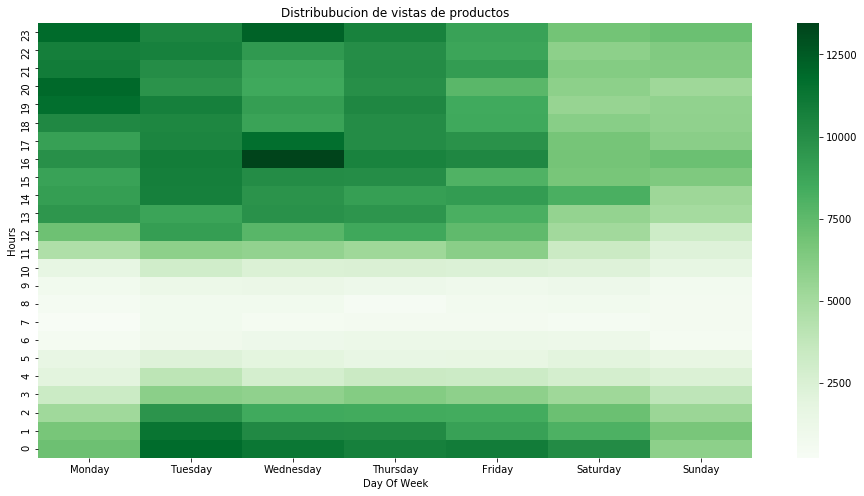

In [5]:
pivoted = pd.pivot_table(eventDeVistaDeProductosPorDiaDeSemanaYHora,values=0,columns='dayOfWeek', \
               index='hour')
fig, ax = plt.subplots(figsize=(16,8))  # Sample figsize in inches
g = sns.heatmap(pivoted,cmap='Greens');
g.set_title("Distribubucion de vistas de productos")
g.set_xlabel('Day Of Week')
g.set_ylabel('Hours')
g.invert_yaxis()

plt.show()

Se puede visualizar que entre los rangos de horario que corresponde al intervalo de las 4 y las 10 (horas) hay muy pocas observaciones de vistas de productos, como así también los fin de semanas.

### Cómo se distribuyen las conversiones y los checkouts en el sitio por día y hora de la semana

In [6]:
eventoDeConversionesYChekouts = eventos.loc[(eventos['event'] == 'checkout') | (eventos['event'] == 'conversion')]
eventoDeConversionesYChekouts = eventoDeConversionesYChekouts.copy()  # Se usa para evitar un cartel de advertencia
eventoDeConversionesYChekouts['dayOfWeek'] = eventoDeConversionesYChekouts['timestamp'].dt.day_name()
eventoDeConversionesYChekouts['dayOfWeek'] = pd.Categorical(eventoDeConversionesYChekouts['dayOfWeek'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
eventoDeConversionesYChekouts['hour'] = eventoDeConversionesYChekouts['timestamp'].dt.hour

In [7]:
eventoDeConversionesYCheckoutsPorDiaYHorario = eventoDeConversionesYChekouts.loc[:,['hour','dayOfWeek']]
eventoDeConversionesYCheckoutsPorDiaYHorario = eventoDeConversionesYCheckoutsPorDiaYHorario.groupby(['dayOfWeek','hour']).agg(np.size).reset_index()
eventoDeConversionesYCheckoutsPorDiaYHorario = eventoDeConversionesYCheckoutsPorDiaYHorario.sort_values('dayOfWeek')

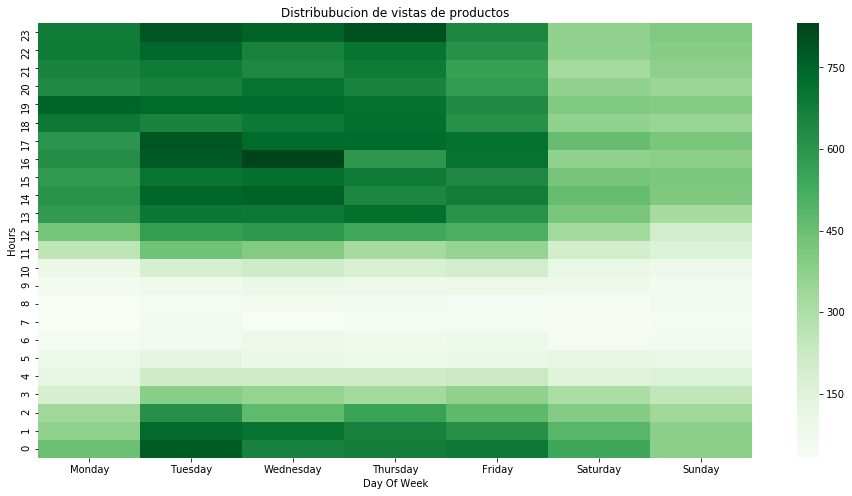

In [8]:
pivoted = pd.pivot_table(eventoDeConversionesYCheckoutsPorDiaYHorario,values=0,columns='dayOfWeek', \
               index='hour')
fig, ax = plt.subplots(figsize=(16,8))  # Sample figsize in inches
g = sns.heatmap(pivoted,cmap='Greens');
g.set_title("Distribubucion de vistas de productos")
g.set_xlabel('Day Of Week')
g.set_ylabel('Hours')
g.invert_yaxis()

plt.show()

Como conclusion de ambas visualizaciones es que nuestros usuarios, ya sea comprando o haciendo alguna visita de algún producto (modelo, marca o alguna característica en especial) tienen un rango de horario predeterminado que no contempla en su mayoría los horarios de entre las 4 hasta las 10.